# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [14]:
X.shape
new = X.reshape(-1,28)[0]

In [15]:
new.shape

(28,)

### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

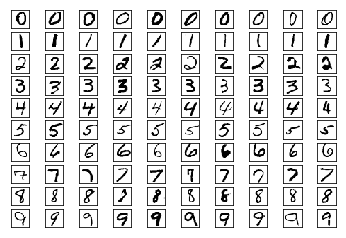

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    
    fig, axs = plt.subplots(10, 10)
    for i in range(num_examples):
        num = [k for k, x in enumerate(mini_train_labels) if x == str(i)][:10]
        for j in range(num_examples):
            plotted = np.reshape(mini_train_data[num[j]], (-1, 28))
            axs[i,j].imshow(plotted, cmap='Greys')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        classifier = KNeighborsClassifier(i)
        trained_classifier = classifier.fit(mini_train_data, mini_train_labels)

        dev_predict = trained_classifier.predict(dev_data)
        print("Number of mislabeled points out of a total %d points for %d nearest neighbors: %d"
          % (len(dev_labels), i, sum(dev_labels != dev_predict)))
        if i == 1:
            print(classification_report(dev_labels, dev_predict))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Number of mislabeled points out of a total 1000 points for 1 nearest neighbors: 116
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Number of mislabeled points out of a total 1000 points for 3 nearest neighbors: 124
Number of mislabeled points out of a total 1000 points for 5 nearest neig

ANSWER: 8 appears to be the most difficult digit to classify.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    times = []
    start_time = time.time()
    for i in train_sizes:
        train = train_data[:i]
        labels = train_labels[:i]
        classifier = KNeighborsClassifier(1)               #get the model
        trained_classifier = classifier.fit(train, labels) #fit the model using the training data
        
        dev_predict = trained_classifier.predict(dev_data) #predict using the model on the development data
        
        accuracies.append(sum(dev_labels == dev_predict)/len(dev_labels)) #calculate accuracy
        times.append(time.time() - start_time)
        start_time = time.time()
    return accuracies, times
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

([0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963],
 [0.25797295570373535,
  0.42984914779663086,
  0.8347682952880859,
  1.735363245010376,
  3.4906609058380127,
  6.942437171936035,
  14.009534358978271,
  28.847858905792236,
  60.508219957351685])

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

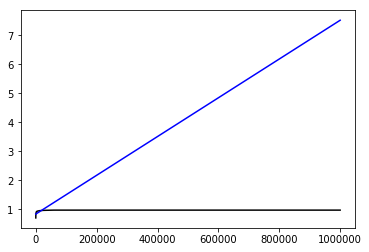

Predicted accuracy for 60000 using linear regression: 1.2361731707874237
Predicted accuracy for 120000 using linear regression: 1.637428053637104
Predicted accuracy for 1000000 using linear regression: 7.522499668765751
R2 of the linear regression model: 0


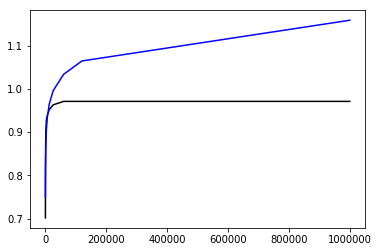

Predicted accuracy for 60000 using transformed linear regression: 1.0335879166434623
Predicted accuracy for 120000 using transformed linear regression: 1.0643212499767956
Predicted accuracy for 1000000 using transformed linear regression: 1.1583312493537086
R2 of the transformed linear regression model: 0.9068304252436641


In [6]:
def P4():

### STUDENT START ###
    new_train_sizes = [60000, 120000, 1000000]
    new_accuracies = P3(new_train_sizes, [])[0]
    
    regr = LinearRegression()
    
    regr.fit(np.reshape(train_sizes, (-1, 1)), accuracies)   #fit the model
    
    all_train_sizes = train_sizes + new_train_sizes
    all_accuracies = accuracies + new_accuracies
    
    all_pred_accuracies = regr.predict(np.reshape(all_train_sizes, (-1, 1))) #predict the accuracies for all train sizes
                                                                             #using the model
    
    plt.plot(all_train_sizes, all_accuracies, color='black') #plot the actual accuracies
    plt.plot(all_train_sizes, all_pred_accuracies, color='blue') #plot the predicted accuracies
    plt.show()
    
    for i in range(len(new_train_sizes)):
        print("Predicted accuracy for %d using linear regression: " %
              (new_train_sizes[i]) + str(all_pred_accuracies[9+i])) #evaluate accuracy on new training set sizes
    print("R2 of the linear regression model: %d" %
          (regr.score(np.reshape(train_sizes, (-1,1)), accuracies))) #calculate R2
    
    ### TRANSFORMATION ###

    log_accuracies = np.log(accuracies)

    regr_new = LinearRegression()
    
    regr_new.fit(np.log(train_sizes).reshape(-1, 1), accuracies) #refit the model using the log transformation
    
    all_train_sizes = train_sizes + new_train_sizes
    all_accuracies = accuracies + new_accuracies
    
    log_all_train_sizes = np.log(all_train_sizes)
    
    log_all_pred_accuracies = regr_new.predict(log_all_train_sizes.reshape(-1,1)) #predict new accuracies based on the
                                                                              #transformed model
    
    plt.plot(all_train_sizes, all_accuracies, color='black') #plot the actual accuracies
    plt.plot(all_train_sizes, log_all_pred_accuracies, color='blue') #plot the new predicted accuracies
    plt.show()
    
    for i in range(len(new_train_sizes)):
        print("Predicted accuracy for %d using transformed linear regression: " %
              (new_train_sizes[i]) + str(log_all_pred_accuracies[9+i])) #evaluate accuracy on new training set sizes
    print("R2 of the transformed linear regression model: " +
          str(regr_new.score(np.log(train_sizes).reshape(-1, 1), accuracies))) #calculate R2
    
### STUDENT END ###

P4()

ANSWER: The data is not linear, so using linear regression is not appropriate. The model was improved greatly by using a logistic model.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

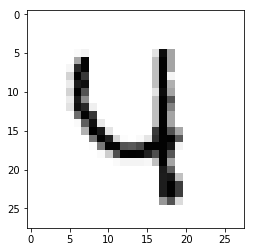

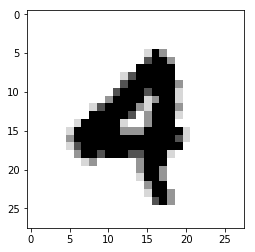

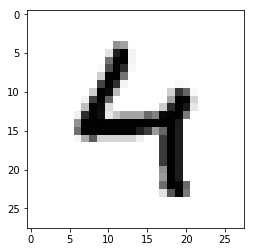

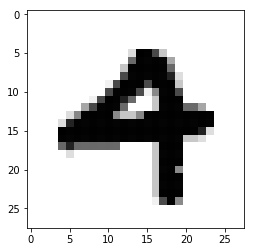

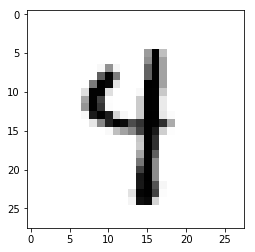

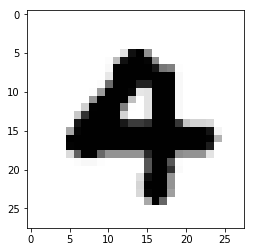

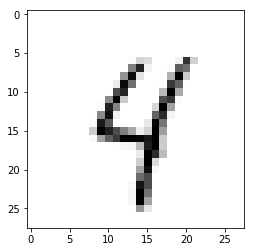

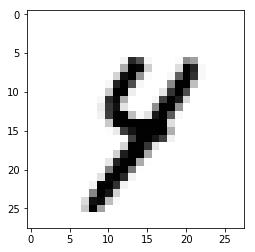

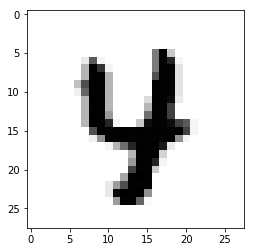

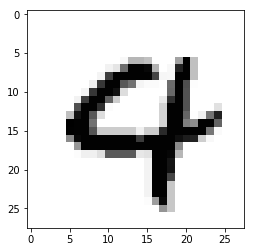

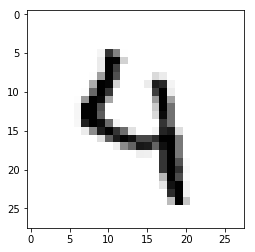

array([[101,   0,   1,   0,   0,   0,   1,   1,   2,   0],
       [  0, 116,   1,   0,   0,   0,   0,   0,   1,   0],
       [  1,   4,  84,   2,   2,   0,   2,   4,   6,   1],
       [  0,   2,   0,  84,   0,   6,   0,   2,   3,   0],
       [  0,   0,   1,   0,  78,   0,   0,   2,   0,  11],
       [  2,   0,   0,   1,   1,  77,   5,   0,   2,   0],
       [  1,   2,   1,   0,   1,   2,  94,   0,   1,   0],
       [  0,   1,   1,   0,   0,   0,   0,  96,   0,   4],
       [  1,   5,   4,   3,   1,   3,   0,   1,  72,   4],
       [  0,   1,   0,   0,   3,   2,   0,   7,   0,  82]], dtype=int64)

In [7]:
def P5():

### STUDENT START ###
    classifier = KNeighborsClassifier(1)
    trained_classifier = classifier.fit(mini_train_data, mini_train_labels)
    
    dev_predict = trained_classifier.predict(dev_data)
    
    incorrect = []
    incorrect = [dev_labels[dev_labels != dev_predict]]
    
    #get all the 4s that were misclassified as 9s
    wrong4 = []
    for i in range(len(dev_predict)):
        if dev_predict[i] != dev_labels[i]:
            if dev_labels[i] == '4' and dev_predict[i] == '9':
                wrong4.append(i)
                
    #draw the misclassified 4s
    for i in wrong4:
        reshaped = np.reshape(dev_data[i], (-1, 28))
        plt.imshow(reshaped, cmap = "Greys")
        plt.show()
    
    return confusion_matrix(dev_labels, dev_predict)
    
### STUDENT END ###

P5()

ANSWER: It looks like the model most often confuses 4 and 9.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
def P6():
    
### STUDENT START ###
    #no filtering
    
    #Get k-1 nearest neighbors classifier
    classifier = KNeighborsClassifier(1)
    #train the classifier
    trained_classifier = classifier.fit(mini_train_data, mini_train_labels)
    
    #print accuracy for filtering BOTH dev and training data
    dev_predict = trained_classifier.predict(dev_data)
    print("Predicted accuracy for 1 nearest neighbor, no filtering: " + str(sum(dev_labels == dev_predict)/len(dev_labels)))
    #filter training set
    reshaped_mini_train = []
    for i in range(len(mini_train_data)):
        reshaped = np.reshape(mini_train_data[i], (-1,28))
        reshaped_mini_train.append(reshaped)
    
    for i in reshaped_mini_train:
        for j in range(len(i)):
            for k in range(len(i[j])):
                if j != 0 and k != 0 and j != 27 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j+1][k+1]+i[j-1][k-1]+i[j+1][k]+i[j-1][k]+i[j+1][k-1]+i[j-1][k+1]
                    i[j][k] = total/9
                elif j == 0 and k != 0 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]+i[j+1][k-1]
                    i[j][k] = total/6
                elif k == 0 and j != 0 and j != 27:
                    total = i[j][k]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]+i[j-1][k]+i[j-1][k+1]
                    i[j][k] = total/6
                elif j == 27 and k != 0 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j-1][k-1]+i[j-1][k]+i[j-1][k+1]
                    i[j][k] = total/6
                elif k == 27 and j != 0 and j != 27:
                    total = i[j][k]+i[j][k-1]+i[j-1][k-1]+i[j+1][k]+i[j-1][k]+i[j+1][k-1]
                    i[j][k] = total/6
                elif k == 0 and j == 0:
                    total = i[j][k]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]
                    i[j][k] = total/4
                elif k == 27 and j == 27:
                    total = i[j][k]+i[j][k-1]+i[j-1][k-1]+i[j-1][k]
                    i[j][k] = total/4
    
    #get data back to the right size
    reshaped_mini_train = np.reshape(reshaped_mini_train, (1000, 784))
    
    #Get k-1 nearest neighbor classifier
    classifier = KNeighborsClassifier(1)
    #train the classifier
    trained_classifier = classifier.fit(reshaped_mini_train, mini_train_labels)
    
    #Print accuracy for ONLY filtered training data
    dev_predict = trained_classifier.predict(dev_data)
    print("Predicted accuracy for 1 nearest neighbor, only filtering training data: " + str(
        sum(dev_labels == dev_predict)/len(dev_labels)))
    
    #filter dev set
    reshaped_dev_data = []
    for i in range(len(dev_data)):
        reshaped = np.reshape(dev_data[i], (-1,28))
        reshaped_dev_data.append(reshaped)
    
    for i in reshaped_dev_data:
        for j in range(len(i)):
            for k in range(len(i[j])):
                if j != 0 and k != 0 and j != 27 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j+1][k+1]+i[j-1][k-1]+i[j+1][k]+i[j-1][k]+i[j+1][k-1]+i[j-1][k+1]
                    i[j][k] = total/9
                elif j == 0 and k != 0 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]+i[j+1][k-1]
                    i[j][k] = total/6
                elif k == 0 and j != 0 and j != 27:
                    total = i[j][k]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]+i[j-1][k]+i[j-1][k+1]
                    i[j][k] = total/6
                elif j == 27 and k != 0 and k != 27:
                    total = i[j][k]+i[j][k-1]+i[j][k+1]+i[j-1][k-1]+i[j-1][k]+i[j-1][k+1]
                    i[j][k] = total/6
                elif k == 27 and j != 0 and j != 27:
                    total = i[j][k]+i[j][k-1]+i[j-1][k-1]+i[j+1][k]+i[j-1][k]+i[j+1][k-1]
                    i[j][k] = total/6
                elif k == 0 and j == 0:
                    total = i[j][k]+i[j][k+1]+i[j+1][k+1]+i[j+1][k]
                    i[j][k] = total/4
                elif k == 27 and j == 27:
                    total = i[j][k]+i[j][k-1]+i[j-1][k-1]+i[j-1][k]
                    i[j][k] = total/4
    
    #get data back to the right size
    reshaped_dev_data = np.reshape(reshaped_dev_data, (1000, 784))
    
    #Get k-1 nearest neighbor classifier
    classifier_dev = KNeighborsClassifier(1)
    #train the classifier
    trained_classifier_dev = classifier_dev.fit(mini_train_data, mini_train_labels)
    
    #Print accuracy for ONLY filtered dev data
    dev_predict = trained_classifier_dev.predict(reshaped_dev_data)
    print("Predicted accuracy for 1 nearest neighbor, only filtering dev data: " + str(
        sum(dev_labels == dev_predict)/len(dev_labels)))
    
    #filtering both dev and training data
    
    #Get k-1 nearest neighbors classifier
    classifier_both = KNeighborsClassifier(1)
    #train the classifier
    trained_classifier_both = classifier_both.fit(reshaped_mini_train, mini_train_labels)
    
    #print accuracy for filtering BOTH dev and training data
    dev_predict = trained_classifier_both.predict(reshaped_dev_data)
    print("Predicted accuracy for 1 nearest neighbor, filtering training and dev data: " + str(
        sum(dev_labels == dev_predict)/len(dev_labels)))
    
### STUDENT END ###

P6()

Predicted accuracy for 1 nearest neighbor, no filtering: 0.884
Predicted accuracy for 1 nearest neighbor, only filtering training data: 0.902
Predicted accuracy for 1 nearest neighbor, only filtering dev data: 0.908
Predicted accuracy for 1 nearest neighbor, filtering training and dev data: 0.908


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###
    #binary predictor
    binary = BernoulliNB(binarize = 0.5)
    
    trained_binary = binary.fit(mini_train_data, mini_train_labels)
    
    binary_predict = trained_binary.predict(dev_data)
    
    print("Predicted accuracy using Binary Naive Bayes: " + str(sum(dev_labels == binary_predict)/len(dev_labels)))

    #multinomial predictor
    #pre-process data
    for i in mini_train_data:
        for j in range(len(i)):
            if i[j] < 0.33:
                i[j] = 0
            elif i[j] >= 0.33 and i[j] < 0.66:
                i[j] = 1
            else:
                i[j] = 2

    multi = MultinomialNB()
    
    trained_multi = multi.fit(mini_train_data, mini_train_labels)
    
    multi_predict = trained_multi.predict(dev_data)
    
    print("Predicted accuracy using Multinomial Naive Bayes: " + str(sum(dev_labels == multi_predict)/len(dev_labels)))
    
### STUDENT END ###

P7()

Predicted accuracy using Binary Naive Bayes: 0.811
Predicted accuracy using Multinomial Naive Bayes: 0.801


ANSWER: The multinomial model does not improve the results, because the multinomial model is best used for counts of data (such as the number of times a word appears in a set of text), whereas our data is made up of pixel values, not frequencies.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
def P8(alphas):

### STUDENT START ###
    classifier = GridSearchCV(BernoulliNB(binarize = 0.5), param_grid = alphas)
    classifier.fit(mini_train_data, mini_train_labels)
    print(classifier.cv_results_['mean_test_score'])
    return classifier

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

[0.812 0.827 0.824 0.822 0.821 0.822 0.817 0.817 0.783]

Best alpha =  {'alpha': 0.0001}


ANSWER: The best value for alpha is 0.001. When alpha is near 0, the accuracy is overall better thn when the accuracy is higher; this makes sense to me, since the higher values have the potential to lower the stability of the model by over-weighting the missing values.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [11]:
def P9():

### STUDENT END ###

    #pre-fixed model
    classifier = GaussianNB()
    trained_classifier = classifier.fit(mini_train_data, mini_train_labels)
    dev_predict = trained_classifier.predict(dev_data)
    print("Accuracy of Gaussian Naive Bayes model: " + str(sum(dev_predict == dev_labels)/len(dev_labels)))
    
    #fixed model- normalize the training and dev values
    
    #normalize training data
    new_mini_train = []
    for i in range(len(mini_train_data)):
        empty = []
        for j in range(len(mini_train_data[i])):
            standardized = (np.sqrt(len(mini_train_data[i]))*(
                mini_train_data[i][j] - np.mean(trained_classifier.theta_[int(mini_train_labels[i])])))/(np.mean(
                trained_classifier.sigma_[int(mini_train_labels[i])]))
            empty.append(standardized)
        new_mini_train.append(empty)
    
    #normalize dev data
    new_dev = []
    for i in range(len(dev_data)):
        empty = []
        for j in range(len(dev_data[i])):
            standardized = (np.sqrt(len(dev_data[i]))*(
                dev_data[i][j] - np.mean(trained_classifier.theta_[int(dev_labels[i])])))/(np.mean(
                trained_classifier.sigma_[int(dev_labels[i])]))
            empty.append(standardized)
        new_dev.append(empty)

    #make a new classifier for the normalized data
    classifier_new = GaussianNB()
    trained_classifier_new = classifier_new.fit(new_mini_train, mini_train_labels)
    new_dev_predict = trained_classifier_new.predict(new_dev)
    
    print("Accuracy of modified Gaussian Naive Bayes model: " + str(sum(new_dev_predict == dev_labels)/len(dev_labels)))

### STUDENT END ###

P9()

Accuracy of Gaussian Naive Bayes model: 0.425
Accuracy of modified Gaussian Naive Bayes model: 0.707


ANSWER: Since the Gaussian Naive Bayes model assumes the data is normally distributed, I modified the data by standardizing it to a normal distribution using the formula for standardizing a distribution, $$\frac{\sqrt{n}\times (\bar{x} - \mu)}{\sigma}$$

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

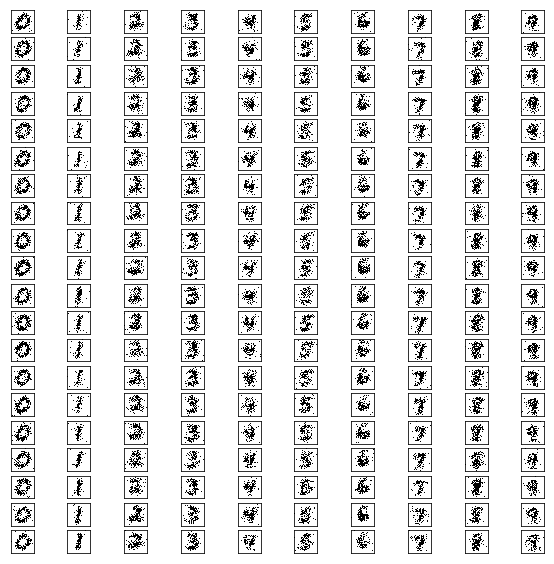

In [12]:
def P10(num_examples):

### STUDENT START ###
    classifier = BernoulliNB(binarize=0.5)
    trained_classifier = classifier.fit(mini_train_data, mini_train_labels)
    
    fig, axs = plt.subplots(20, 10, figsize=(10,10))
    
    for i in range(num_examples):
        img = []
        normal_probs = np.exp(trained_classifier.feature_log_prob_)
        for j in range(len(trained_classifier.feature_log_prob_)):
            row = []
            for k in range(len(trained_classifier.feature_log_prob_[j])):
                if np.random.rand() > normal_probs[j][k]:
                    row.append(0)
                else:
                    row.append(1)
            row = np.reshape(row, (-1, 28))
            img.append(row)
    
        for j in range(10):
            axs[i,j].imshow(img[j], cmap='Greys')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

### STUDENT END ###

P10(20)

ANSWER: The boundaries of the generated images are much less clear than those of the training digit images. Most numbers are typically not very legible; for example, digits 4 and 9 are usually extremely difficult to discern.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    classifier = BernoulliNB(binarize = 0.5)
    trained_classifier = classifier.fit(mini_train_data, mini_train_labels)
    
    predicted = trained_classifier.predict_proba(dev_data)

    for i in range(len(buckets)):
        p = []
        inds = []
        for j in range(len(predicted)):
            if i == 0:
                if max(predicted[j]) <= buckets[i]:
                    p.append(predicted[j])
                    if np.where(predicted[j] == max(predicted[j]))[0][0] == int(dev_labels[j]):
                        correct[i] += 1
            else:
                if max(predicted[j]) <= buckets[i] and max(predicted[j]) > buckets[i-1]:
                    p.append(predicted[j])
                    if np.where(predicted[j] == max(predicted[j]))[0][0] == int(dev_labels[j]):
                        correct[i] += 1

        total[i] = len(p)

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   2    accuracy = 0.500
p(pred) is 0.5000000000000 to 0.9000000000000    total =  40    accuracy = 0.300
p(pred) is 0.9000000000000 to 0.9990000000000    total = 102    accuracy = 0.461
p(pred) is 0.9990000000000 to 0.9999900000000    total =  66    accuracy = 0.530
p(pred) is 0.9999900000000 to 0.9999999000000    total =  81    accuracy = 0.679
p(pred) is 0.9999999000000 to 0.9999999990000    total =  83    accuracy = 0.675
p(pred) is 0.9999999990000 to 0.9999999999900    total =  55    accuracy = 0.764
p(pred) is 0.9999999999900 to 0.9999999999999    total =  63    accuracy = 0.841
p(pred) is 0.9999999999999 to 1.0000000000000    total = 508    accuracy = 0.902


ANSWER: This classifier seems to be weakly calibrated. There appears to be a positive correlation between the posterior probability and accuracy, but the accuracy does not usually match the posterior probability.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [14]:
def P12():

### STUDENT START ###
    #original model
    bnb = BernoulliNB(binarize=0.5)
    fitted = bnb.fit(mini_train_data, mini_train_labels)
    dev_predict = fitted.predict(dev_data)
    print("Accuracy of the original model: " + str(sum(dev_labels == dev_predict)/len(dev_predict)))
    
    #sum pixel data by rows
    reshaped = mini_train_data.reshape(-1,28)
    reshaped_data = []
    for i in range(len(mini_train_data)):
        reshaped_new = []
        reshaped = mini_train_data[i].reshape(-1,28)
        for j in range(len(reshaped)):
            reshaped_new.append(sum(reshaped[j]))
        reshaped_data.append(reshaped_new)
        
    reshaped_dev = dev_data.reshape(-1,28)
    reshaped_dev_data = []
    for i in range(len(dev_data)):
        reshaped_new = []
        reshaped = dev_data[i].reshape(-1,28)
        for j in range(len(reshaped)):
            reshaped_new.append(sum(reshaped[j]))
        reshaped_dev_data.append(reshaped_new)
        
    bnb = BernoulliNB(binarize=0.5)
    fitted = bnb.fit(reshaped_data, mini_train_labels)
    dev_predict = fitted.predict(reshaped_dev_data)
    print("Accuracy of summed pixels of each row: " + str(sum(dev_labels==dev_predict)/len(dev_predict)))
    
    #average pixel data by rows
    reshaped = mini_train_data.reshape(-1,28)
    reshaped_data = []
    for i in range(len(mini_train_data)):
        reshaped_new = []
        reshaped = mini_train_data[i].reshape(-1,28)
        for j in range(len(reshaped)):
            reshaped_new.append(np.mean(reshaped[j]))
        reshaped_data.append(reshaped_new)
        
    reshaped_dev = dev_data.reshape(-1,28)
    reshaped_dev_data = []
    for i in range(len(dev_data)):
        reshaped_new = []
        reshaped = dev_data[i].reshape(-1,28)
        for j in range(len(reshaped)):
            reshaped_new.append(np.mean(reshaped[j]))
        reshaped_dev_data.append(reshaped_new)
        
    bnb = BernoulliNB(binarize=0.5)
    fitted = bnb.fit(reshaped_data, mini_train_labels)
    dev_predict = fitted.predict(reshaped_dev_data)
    print("Accuracy of averaged pixels of each row: " + str(sum(dev_labels==dev_predict)/len(dev_predict)))
    
    #sum pixel data by columns
    reshaped_data = []
    for i in range(len(mini_train_data)):
        reshaped = mini_train_data.reshape(-1,28)
        mylist = []
        for column in range(len(reshaped[0])):
            total = 0
            for row in range(len(reshaped[0])):
                total += reshaped[row][column]
            mylist.append(total)
        reshaped_data.append(mylist)
        
    reshaped_dev_data = []
    for i in range(len(dev_data)):
        reshaped = mini_train_data.reshape(-1,28)
        mylist = []
        for column in range(len(reshaped[0])):
            total = 0
            for row in range(len(reshaped[0])):
                total += reshaped[row][column]
            mylist.append(total)
        reshaped_dev_data.append(mylist)
        
    bnb = BernoulliNB(binarize=0.5)
    fitted = bnb.fit(reshaped_data, mini_train_labels)
    dev_predict = fitted.predict(reshaped_dev_data)
    print("Accuracy of summed pixels of each column: " + str(sum(dev_labels==dev_predict)/len(dev_predict)))
    
    #average pixel data by columns
    reshaped_data = []
    for i in range(len(mini_train_data)):
        reshaped = mini_train_data.reshape(-1,28)
        mylist = []
        for column in range(len(reshaped[0])):
            total = 0
            for row in range(len(reshaped[0])):
                total += reshaped[row][column]
            mylist.append(total/len(reshaped[row]))
        reshaped_data.append(mylist)
        
    reshaped_dev_data = []
    for i in range(len(dev_data)):
        reshaped = mini_train_data.reshape(-1,28)
        mylist = []
        for column in range(len(reshaped[0])):
            total = 0
            for row in range(len(reshaped[0])):
                total += reshaped[row][column]
            mylist.append(total/len(reshaped[row]))
        reshaped_dev_data.append(mylist)
        
    bnb = BernoulliNB(binarize=0.5)
    fitted = bnb.fit(reshaped_data, mini_train_labels)
    dev_predict = fitted.predict(reshaped_dev_data)
    print("Accuracy of averaged pixels of each column: " + str(sum(dev_labels==dev_predict)/len(dev_predict)))

### STUDENT END ###

P12()

Accuracy of the original model: 0.759
Accuracy of summed pixels of each row: 0.297
Accuracy of averaged pixels of each row: 0.143
Accuracy of summed pixels of each column: 0.094
Accuracy of averaged pixels of each column: 0.094
